Logistic Regression (No Class Balancing) Training Accuracy: 0.7274
Logistic Regression (No Class Balancing) Test Accuracy: 0.6981


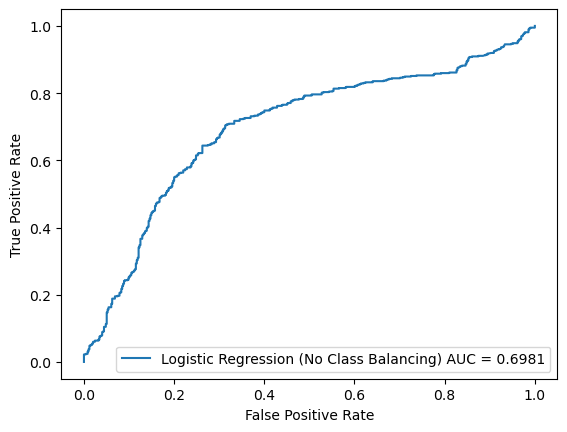

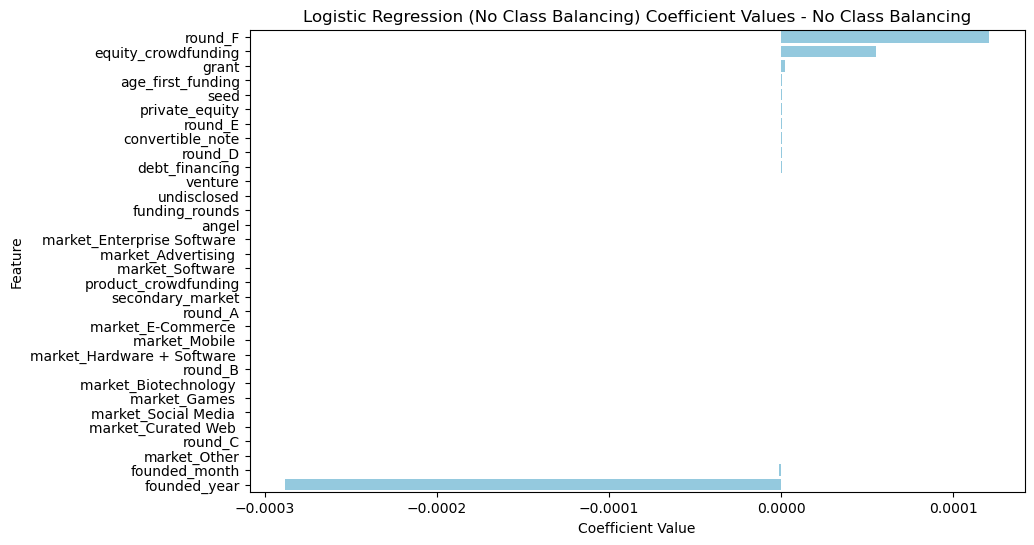

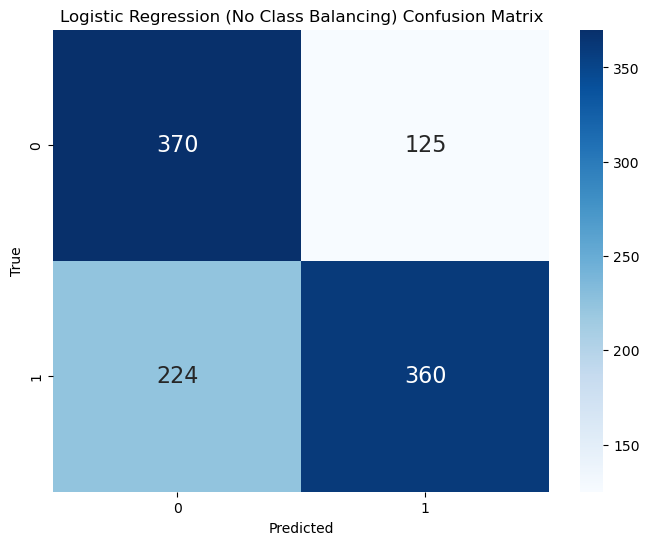


Logistic Regression (No Class Balancing) Classification Report:
               precision    recall  f1-score   support

           0      0.623     0.747     0.680       495
           1      0.742     0.616     0.674       584

    accuracy                          0.677      1079
   macro avg      0.683     0.682     0.677      1079
weighted avg      0.688     0.677     0.676      1079


Cross-Validation Results:
Mean AUC: 0.7176
Standard Deviation: 0.0291


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Load the dataset
startup_df = pd.read_csv("modelling_df.csv", delimiter=',', header=0, encoding="ISO-8859-1", skipinitialspace=True)

# Data Preparation
X = pd.get_dummies(startup_df.drop(['status_binary'], axis=1))
y = startup_df['status_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

def evaluate_model(model, X_train, X_test, y_train, y_test, name="Model"):
    model.fit(X_train, y_train)
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    print(f'{name} Training Accuracy: {train_accuracy:.4f}')
    print(f'{name} Test Accuracy: {test_accuracy:.4f}')
    
    # Plot ROC Curve
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc_value = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f"{name} AUC = {auc_value:.4f}")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

    # Feature Importance Plot with Values
    plt.figure(figsize=(10, 6))
    importance = model.coef_.flatten()
    sorted_idx = importance.argsort()[::-1]
    sns.barplot(x=importance[sorted_idx], y=X_train.columns[sorted_idx], color='skyblue')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.title(f'{name} Coefficient Values ')
    plt.show()

    # Confusion Matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Classification Report
    classification_report_result = classification_report(y_test, y_pred, digits=3)
    print(f'\n{name} Classification Report:\n', classification_report_result)

# Logistic Regression without Class Balancing
logreg = LogisticRegressionCV(max_iter=10000, scoring='roc_auc')
evaluate_model(logreg, X_train, X_test, y_train, y_test, "Logistic Regression ")

# Perform Cross-Validation
cv_results = cross_val_score(logreg, X, y, cv=StratifiedKFold(10), scoring='roc_auc')
print('\nCross-Validation Results:')
print(f'Mean AUC: {cv_results.mean():.4f}')
print(f'Standard Deviation: {cv_results.std():.4f}')




Logistic Regression with Balanced Class Weights (SMOTE):
Training Accuracy: 0.7262
Test Accuracy: 0.7130


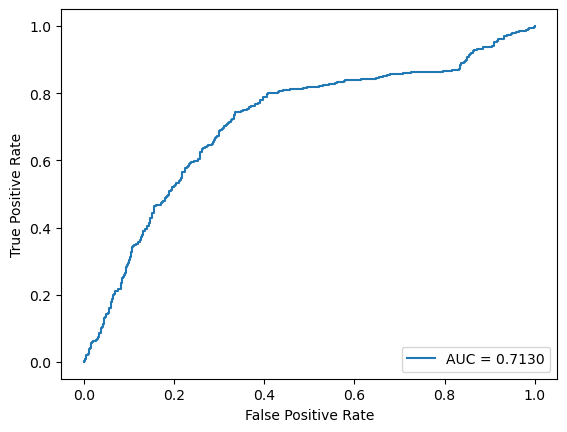

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
from sklearn.feature_selection import RFECV
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from imblearn.over_sampling import SMOTE

# Load the dataset
startup_df = pd.read_csv("modelling_df.csv", delimiter=',', header=0, encoding="ISO-8859-1", skipinitialspace=True)

# Copy the DataFrame for modeling
modelling_df = startup_df.copy()

# Data Preparation
X = pd.get_dummies(modelling_df.drop(['status_binary'], axis=1))
y = modelling_df['status_binary']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=10)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Logistic Regression with Balanced Class Weights
logreg_balanced = LogisticRegressionCV(max_iter=10000, scoring='roc_auc', class_weight='balanced')
logreg_balanced.fit(X_train_balanced, y_train_balanced)

# Evaluate and Print Results
print('\nLogistic Regression with Balanced Class Weights (SMOTE):')
print('Training Accuracy: {:.4f}'.format(logreg_balanced.score(X_train_balanced, y_train_balanced)))
print('Test Accuracy: {:.4f}'.format(logreg_balanced.score(X_test, y_test)))

# Plot ROC Curve for the Final Model
y_pred_proba_balanced = logreg_balanced.predict_proba(X_test)[:, 1]
fpr_balanced, tpr_balanced, _ = metrics.roc_curve(y_test, y_pred_proba_balanced)
auc_balanced = metrics.roc_auc_score(y_test, y_pred_proba_balanced)
plt.plot(fpr_balanced, tpr_balanced, label="AUC = {:.4f}".format(auc_balanced))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()



C:\Users\aa3-adebayo\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aa3-adebayo\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_opt

Feature Importances (Logistic Regression with Balanced Weights):
venture                 0.178911
seed                    0.026920
private_equity          0.006848
debt_financing          0.006049
round_D                 0.004825
undisclosed             0.004519
grant                   0.004079
round_E                 0.002188
equity_crowdfunding     0.001837
product_crowdfunding    0.001048
founded_year            0.000649
convertible_note        0.000624
round_F                 0.000478
secondary_market        0.000295
founded_month           0.000035
dtype: float64


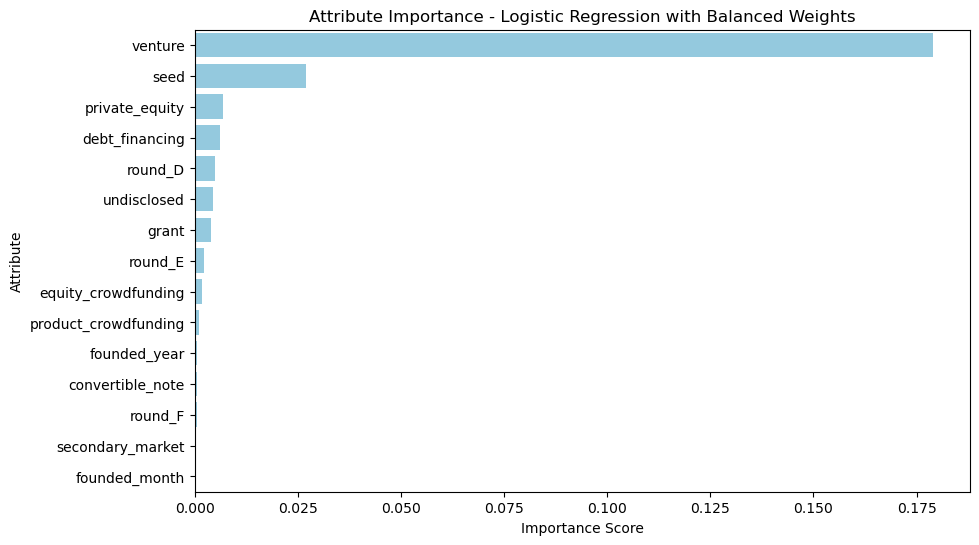

Confusion Matrix (Logistic Regression with Balanced Weights):
[[404  96]
 [275 304]]
Classification Report (Logistic Regression with Balanced Weights):
              precision    recall  f1-score   support

           0      0.595     0.808     0.685       500
           1      0.760     0.525     0.621       579

    accuracy                          0.656      1079
   macro avg      0.677     0.667     0.653      1079
weighted avg      0.684     0.656     0.651      1079



In [2]:
# Perform Recursive Feature Elimination with Cross-Validation (RFECV) for logistic regression with balanced weights
rfecv_balanced = RFECV(estimator=logreg_balanced, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv_balanced.fit(X_train_balanced, y_train_balanced)
# Select features using Recursive Feature Elimination with Cross-Validation (RFECV) for logistic regression with balanced weights
selected_features_balanced = X_train_balanced.columns[rfecv_balanced.support_]

# Drop non-selected features from the feature matrix X
X_train_balanced_selected = X_train_balanced[selected_features_balanced]
X_test_selected = X_test[selected_features_balanced]

# Fit the logistic regression model using the training data with balanced weights
logreg_balanced.fit(X_train_balanced_selected, y_train_balanced)

# Evaluate feature importance using permutation importance for logistic regression with balanced weights
result_balanced = permutation_importance(logreg_balanced, X_train_balanced_selected, y_train_balanced, n_repeats=10, random_state=0)

# Create a Series of feature importances sorted in descending order for logistic regression with balanced weights
feature_importances_balanced = pd.Series(result_balanced.importances_mean, index=X_train_balanced_selected.columns.values).sort_values(ascending=False)

# Display the feature importances for logistic regression with balanced weights
print("Feature Importances (Logistic Regression with Balanced Weights):")
print(feature_importances_balanced)

# Create a horizontal bar plot using seaborn for logistic regression with balanced weights
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances_balanced.values, y=feature_importances_balanced.index, color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Attribute')
plt.title('Attribute Importance - Logistic Regression with Balanced Weights')
plt.show()

# Predict the target variable for the test set for logistic regression with balanced weights
y_pred_balanced = logreg_balanced.predict(X_test_selected)

# Display the Confusion Matrix for logistic regression with balanced weights
conf_matrix_balanced = confusion_matrix(y_test, y_pred_balanced)
print("Confusion Matrix (Logistic Regression with Balanced Weights):")
print(conf_matrix_balanced)

# Display the Classification Report for logistic regression with balanced weights
class_report_balanced = classification_report(y_test, y_pred_balanced, digits=3)
print("Classification Report (Logistic Regression with Balanced Weights):")
print(class_report_balanced)
